In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('crime.csv')

In [3]:
df.drop(['MINUTE'], axis = 1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           530652 non-null  object 
 1   YEAR           530652 non-null  int64  
 2   MONTH          530652 non-null  int64  
 3   DAY            530652 non-null  int64  
 4   HOUR           476290 non-null  float64
 5   HUNDRED_BLOCK  530639 non-null  object 
 6   NEIGHBOURHOOD  474028 non-null  object 
 7   X              530652 non-null  float64
 8   Y              530652 non-null  float64
 9   Latitude       530652 non-null  float64
 10  Longitude      530652 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 44.5+ MB


In [5]:
df['HOUR'].fillna(99, inplace = True)
df['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
df['HUNDRED_BLOCK'].fillna('N/A', inplace = True)

In [8]:
df['DATE'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})


In [9]:
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

In [10]:
df.index = pd.DatetimeIndex(df['DATE'])

In [11]:
df = df[df['DATE'] < '2017-07-01']

In [12]:
df['TYPE'].value_counts().sort_index()

Break and Enter Commercial                                 33787
Break and Enter Residential/Other                          60768
Homicide                                                     219
Mischief                                                   70253
Offence Against a Person                                   54035
Other Theft                                                51995
Theft from Vehicle                                        172265
Theft of Bicycle                                           25597
Theft of Vehicle                                           38359
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Vehicle Collision or Pedestrian Struck (with Injury)       21871
Name: TYPE, dtype: int64

In [13]:
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'

In [14]:
df['CATEGORY'] = df['TYPE'].apply(category)

In [15]:
vehicle_collision = df[df['CATEGORY'] == 'Vehicle Collision']
crimes = df[df['CATEGORY'] != 'Vehicle Collision']

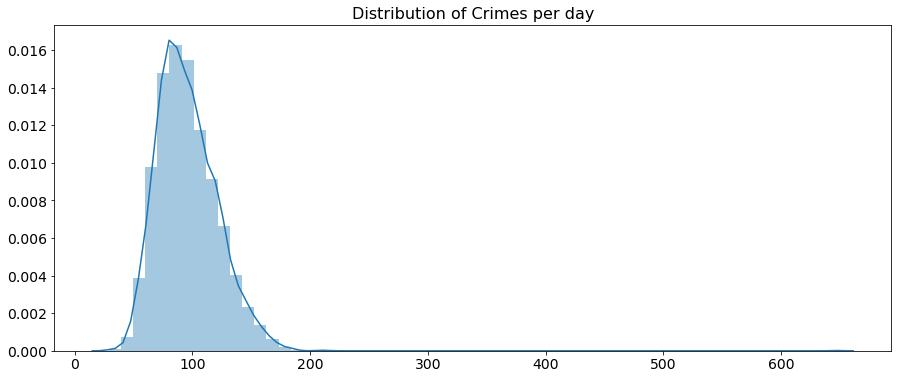

In [16]:
plt.figure(figsize=(15,6))
plt.title('Distribution of Crimes per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(crimes.resample('D').size(), bins=60);

In [17]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507278 entries, 2003-05-12 to 2017-06-05
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           507278 non-null  object        
 1   YEAR           507278 non-null  int64         
 2   MONTH          507278 non-null  int64         
 3   DAY            507278 non-null  int64         
 4   HOUR           507278 non-null  float64       
 5   HUNDRED_BLOCK  507278 non-null  object        
 6   NEIGHBOURHOOD  507278 non-null  object        
 7   X              507278 non-null  float64       
 8   Y              507278 non-null  float64       
 9   Latitude       507278 non-null  float64       
 10  Longitude      507278 non-null  float64       
 11  DATE           507278 non-null  datetime64[ns]
 12  DAY_OF_WEEK    507278 non-null  int64         
 13  CATEGORY       507278 non-null  object        
dtypes: datetime64[ns](1), float64(5), in

In [19]:
crimes.resample('D').size().idxmax()

Timestamp('2011-06-15 00:00:00', freq='D')

In [20]:
crimes_daily = pd.DataFrame(crimes[crimes['DATE'] != '2011-06-15'].resample('D').size())

In [21]:
crimes_daily['MEAN'] = crimes[crimes['DATE'] != '2011-06-15'].resample('D').size().mean()

In [22]:
crimes_daily['STD'] = crimes[crimes['DATE'] != '2011-06-15'].resample('D').size().std()

In [23]:
UCL = crimes_daily['MEAN'] + 3 * crimes_daily['STD']

In [24]:
LCL = crimes_daily['MEAN'] - 3 * crimes_daily['STD']

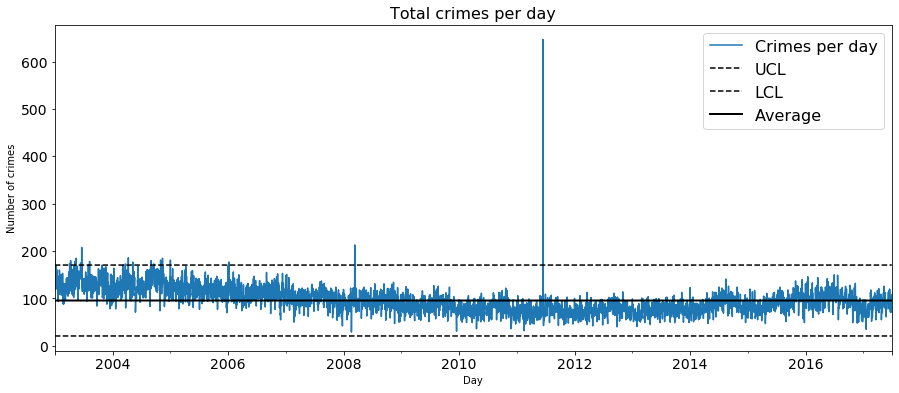

In [26]:
plt.figure(figsize=(15,6))
crimes.resample('D').size().plot(label='Crimes per day')
UCL.plot(color='black', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='black', ls='--', linewidth=1.5, label='LCL')
crimes_daily['MEAN'].plot(color='black', linewidth=2, label='Average')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16});

In [27]:
crimes_pivot_table = crimes[(crimes.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimes_pivot_table_year_count = crimes[(crimes['DATE'] != '2011-06-15')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimes_average = crimes_pivot_table/crimes_pivot_table_year_count
crimes_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

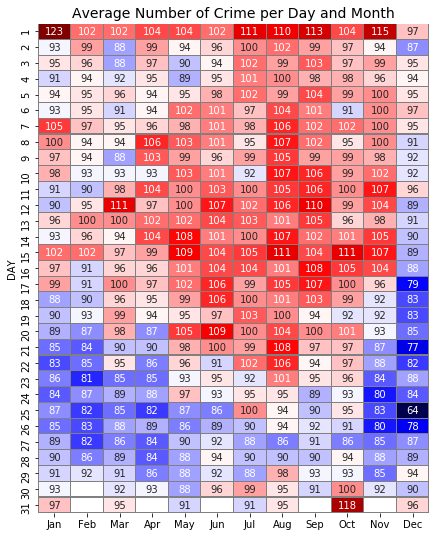

In [28]:
plt.figure(figsize=(7,9))
plt.title('Average Number of Crime per Day and Month', fontsize=14)
sns.heatmap(crimes_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f");

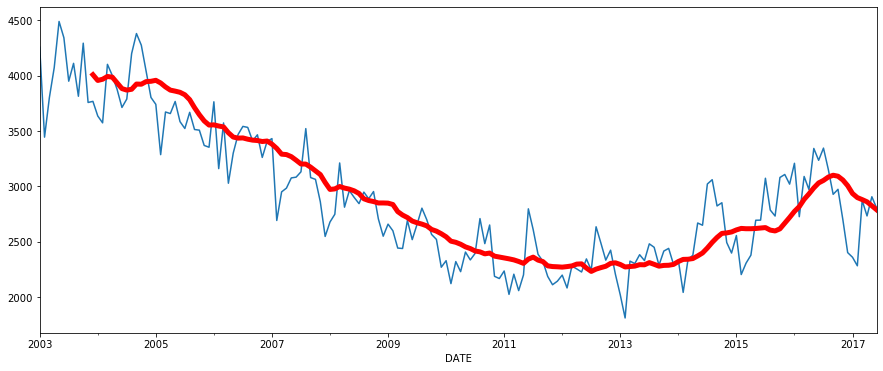

In [46]:
plt.figure(figsize=(15,6))
crimes.resample('M').size().plot(label='Total per month')
crimes.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')

In [55]:
df['date']=df['DATE']

In [65]:
df['MONTH']=pd.to_datetime(df['MONTH'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529403 entries, 2003-05-12 to 2017-06-06
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           529403 non-null  object        
 1   YEAR           529403 non-null  datetime64[ns]
 2   MONTH          529403 non-null  datetime64[ns]
 3   DAY            529403 non-null  int64         
 4   HOUR           529403 non-null  float64       
 5   HUNDRED_BLOCK  529403 non-null  object        
 6   NEIGHBOURHOOD  529403 non-null  object        
 7   X              529403 non-null  float64       
 8   Y              529403 non-null  float64       
 9   Latitude       529403 non-null  float64       
 10  Longitude      529403 non-null  float64       
 11  DATE           529403 non-null  datetime64[ns]
 12  DAY_OF_WEEK    529403 non-null  int64         
 13  CATEGORY       529403 non-null  object        
 14  date           529403 non-null  date

In [68]:
crimes.pivot_table(values='TYPE', index='DATE', columns='CATEGORY', aggfunc=len).resample('M').sum().rolling(window=12).mean().plot(figsize=(15,6), linewidth=4)
plt.title('Moving Average of Crimes per month by Category', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

ValueError: 'DATE' is both an index level and a column label, which is ambiguous.

In [69]:
crimes[crimes['CATEGORY'] == 'Theft']['TYPE'].value_counts()

Theft from Vehicle    172265
Other Theft            51995
Theft of Vehicle       38359
Theft of Bicycle       25597
Name: TYPE, dtype: int64

In [70]:
plt.figure(1)
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

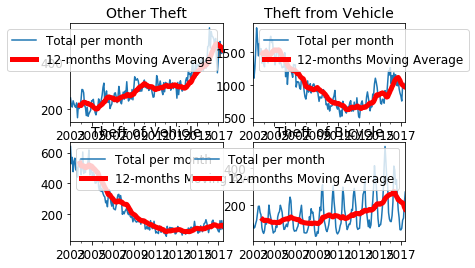

In [83]:
i = 221
for crime_type in crimes[crimes['CATEGORY'] == 'Theft']['TYPE'].unique():    
    plt.subplot(i);
    crimes[crimes['TYPE'] == crime_type].resample('M').size().plot(label='Total per month')
    crimes[crimes['TYPE'] == crime_type].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')
    plt.title(crime_type, fontsize=14)
    plt.xlabel('')
    plt.legend(prop={'size':12})
    plt.tick_params(labelsize=12)
    i = i + 1

In [80]:
df.to_csv('refined.csv')

In [82]:
df = pd.read_csv('refined.csv')
df = df.groupby('DATE').count()['TYPE'].to_frame()

In [5]:
pip install conda

ERROR: Could not find a version that satisfies the requirement menuinst (from conda) (from versions: none)
ERROR: No matching distribution found for menuinst (from conda)


In [69]:
import plotly 

ModuleNotFoundError: No module named 'plotly'

In [70]:
!{sys.executable} -m pip install plotly

    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'
